# AA2-EV02. Estudio de caso. Campaña de marketing #

Hecho por Juan Felipe Bautista

## 0. Importación de librerías necesarias ##

In [4]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Progeso de AA2-EV01 #
(Ignorar si ya se evaluó AA2-EV01)

## 1. Generación y carga del dataset ##

## 2. Análisis Exploratorio de Datos (EDA) ##

### Inspección inicial ###

In [10]:
df = pd.read_csv('quantum_customer_data.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               1000 non-null   object 
 1   Age                      1000 non-null   int64  
 2   AnnualIncome             1000 non-null   int64  
 3   SpendingScore            1000 non-null   int64  
 4   WebVisits                1000 non-null   int64  
 5   DaysSinceLastPurchase    1000 non-null   int64  
 6   EmailsOpened             1000 non-null   int64  
 7   AdClicks                 1000 non-null   int64  
 8   SocialMediaInteractions  1000 non-null   int64  
 9   AvgSessionDuration       1000 non-null   float64
 10  ItemsInCart              1000 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 86.1+ KB


In [14]:
df.describe()

,Age,AnnualIncome,SpendingScore,WebVisits,DaysSinceLastPurchase,EmailsOpened,AdClicks,SocialMediaInteractions,AvgSessionDuration,ItemsInCart
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,43.81900,83.095000,48.433000,14.415000,182.706000,49.866000,24.843000,99.942000,15.35975,6.936000
std,14.99103,37.910621,29.164088,8.579533,105.563968,28.737186,14.306188,57.886747,8.38825,4.315383
min,18.00000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.11000,0.000000
25%,31.00000,51.000000,22.000000,7.000000,90.750000,24.000000,13.000000,50.000000,8.04000,3.000000
50%,44.00000,82.000000,47.000000,14.000000,180.000000,51.000000,24.000000,99.000000,15.30000,7.000000
75%,56.00000,117.000000,73.000000,22.000000,277.000000,75.000000,38.000000,150.250000,22.51250,11.000000
max,69.00000,149.000000,99.000000,29.000000,364.000000,99.000000,49.000000,199.000000,29.98000,14.000000


In [16]:
df.isnull().sum()

CustomerID                 0
Age                        0
AnnualIncome               0
SpendingScore              0
WebVisits                  0
DaysSinceLastPurchase      0
EmailsOpened               0
AdClicks                   0
SocialMediaInteractions    0
AvgSessionDuration         0
ItemsInCart                0
dtype: int64

### Visualización de distribuciones ###

#### Distribución de Age ####

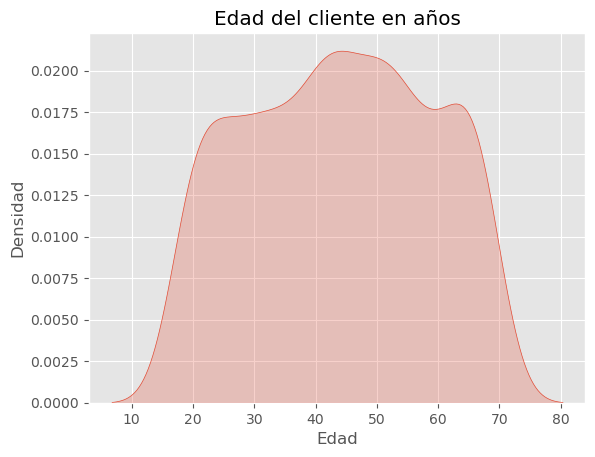

In [20]:
sns.kdeplot(data=df, x='Age', fill=True)

plt.title("Edad del cliente en años")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

#### Distribución de Annual Income ####

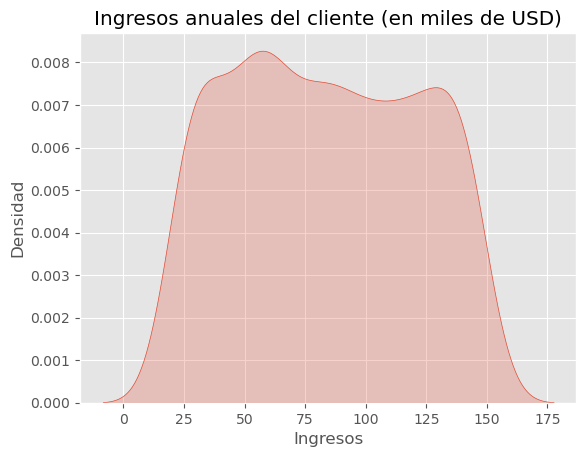

In [22]:
sns.kdeplot(data=df, x='AnnualIncome', fill=True)

plt.title("Ingresos anuales del cliente (en miles de USD)")
plt.xlabel("Ingresos")
plt.ylabel("Densidad")
plt.show()

#### Distribución de Spending Score ####

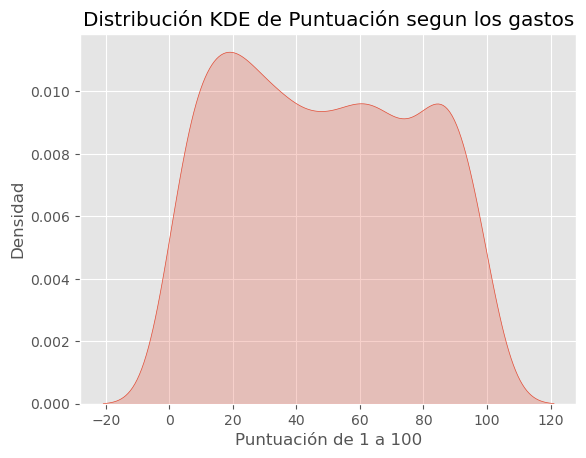

In [25]:
sns.kdeplot(data=df, x='SpendingScore', fill=True)

plt.title("Distribución KDE de Puntuación segun los gastos")
plt.xlabel("Puntuación de 1 a 100")
plt.ylabel("Densidad")
plt.show()

#### Distribución de WebVisits ####

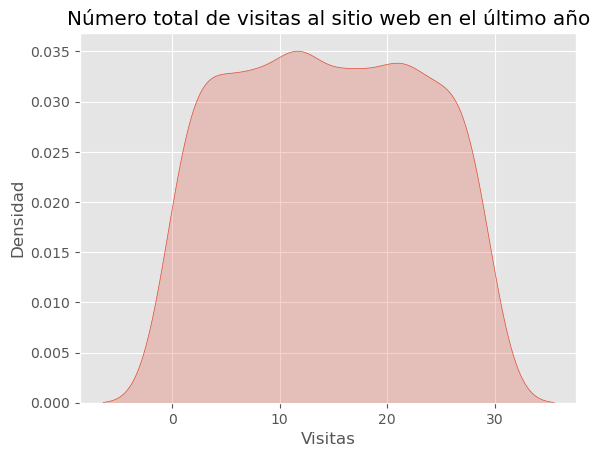

In [28]:
sns.kdeplot(data=df, x='WebVisits', fill=True)

plt.title("Número total de visitas al sitio web en el último año")
plt.xlabel("Visitas")
plt.ylabel("Densidad")
plt.show()

#### Distribución de DaysSinceLastPurchase ####

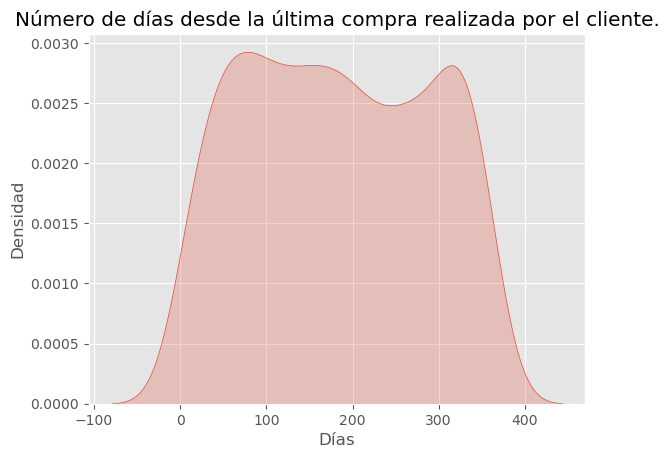

In [32]:
sns.kdeplot(data=df, x='DaysSinceLastPurchase', fill=True)

plt.title("Número de días desde la última compra realizada por el cliente.")
plt.xlabel("Días")
plt.ylabel("Densidad")
plt.show()

#### Distribución de EmailsOpened ####

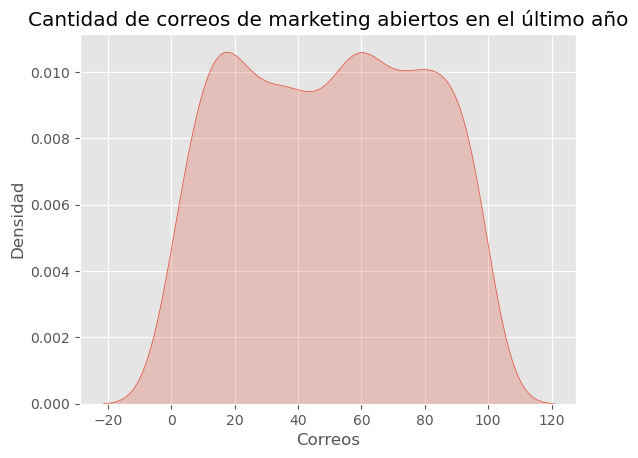

In [35]:
sns.kdeplot(data=df, x='EmailsOpened', fill=True)

plt.title("Cantidad de correos de marketing abiertos en el último año")
plt.xlabel("Correos")
plt.ylabel("Densidad")
plt.show()

#### Distribución de AdClicks ####

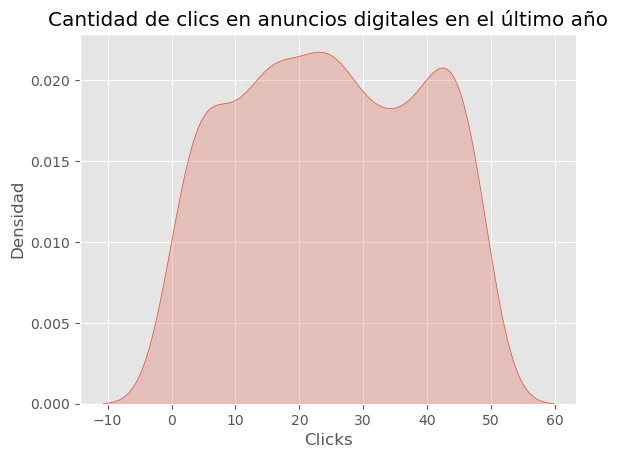

In [38]:
sns.kdeplot(data=df, x='AdClicks', fill=True)

plt.title("Cantidad de clics en anuncios digitales en el último año")
plt.xlabel("Clicks")
plt.ylabel("Densidad")
plt.show()

#### Distribución de SocialMediaInteractions ####

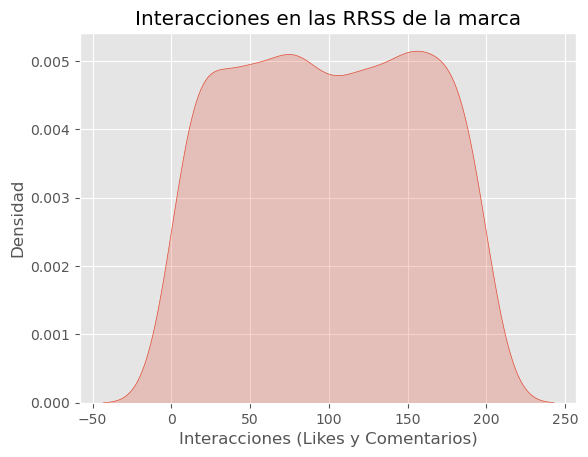

In [41]:
sns.kdeplot(data=df, x='SocialMediaInteractions', fill=True)

plt.title("Interacciones en las RRSS de la marca")
plt.xlabel("Interacciones (Likes y Comentarios)")
plt.ylabel("Densidad")
plt.show()

#### Distribución de AvgSessionDuration ####

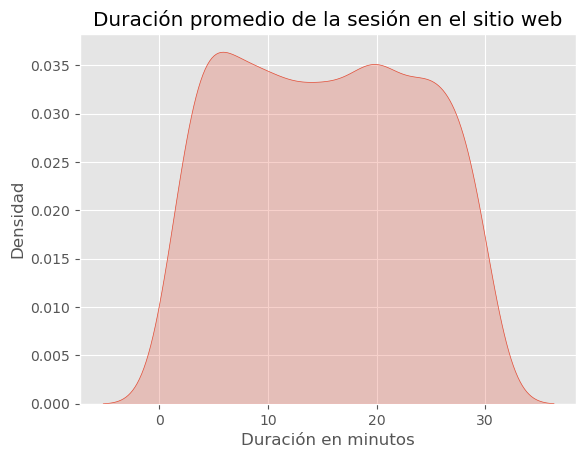

In [44]:
sns.kdeplot(data=df, x='AvgSessionDuration', fill=True)

plt.title("Duración promedio de la sesión en el sitio web")
plt.xlabel("Duración en minutos")
plt.ylabel("Densidad")
plt.show()

#### Distribución de ItemsInCart ####

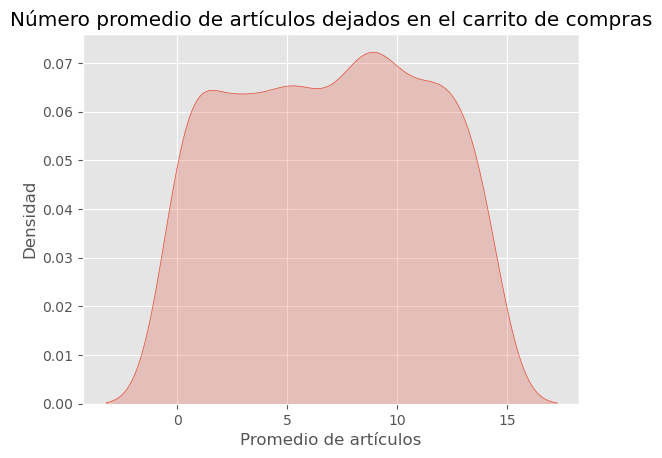

In [47]:
sns.kdeplot(data=df, x='ItemsInCart', fill=True)

plt.title("Número promedio de artículos dejados en el carrito de compras")
plt.xlabel("Promedio de artículos")
plt.ylabel("Densidad")
plt.show()

### Análisis de correlación ###

#### Matriz de correlación ####

                              Age  AnnualIncome  SpendingScore  WebVisits  \
Age                      1.000000     -0.020135      -0.045083   0.015356   
AnnualIncome            -0.020135      1.000000       0.023328  -0.029940   
SpendingScore           -0.045083      0.023328       1.000000   0.020564   
WebVisits                0.015356     -0.029940       0.020564   1.000000   
DaysSinceLastPurchase   -0.037054      0.053420      -0.001268  -0.008878   
EmailsOpened             0.022222      0.035331       0.074169  -0.000330   
AdClicks                 0.033440      0.004483       0.024599  -0.040083   
SocialMediaInteractions -0.001369      0.009421      -0.030443  -0.000996   
AvgSessionDuration       0.024569     -0.013809      -0.023887   0.044633   
ItemsInCart             -0.000767     -0.029045      -0.026894  -0.003202   

                         DaysSinceLastPurchase  EmailsOpened  AdClicks  \
Age                                  -0.037054      0.022222  0.033440   
Annu

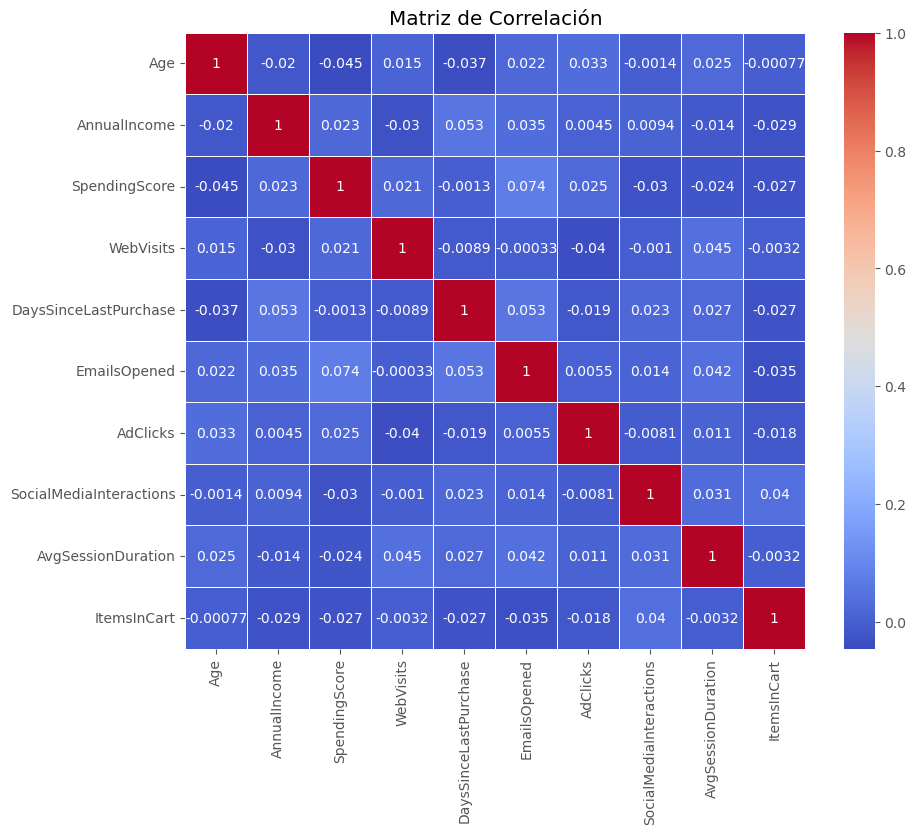

In [51]:
df_matriz = df.iloc[:, 1:] #Excluir columna de identificadores
corr = df_matriz.corr()
print(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

La correlacion entre las variables muy baja o ya de plano negativa

## 3. Preparación y escalado de datos ##

### Selección de Características ###

La columna CustomerID es solo un identificador, no aporta nada en la busqueda de patrones y es mejor eliminarla ya que está en formato de strings y hara que el código del escalador de error

In [57]:
# linea de código para eliminar columna 
data_noId = df.drop(columns=["CustomerID"])

### Escalado de datos ###

In [60]:
# Aplicación de StandarScaler
# ===============================

scaler = StandardScaler()
data_transformed = scaler.fit_transform(data_noId)
data_transformed

array([[ 0.81295917,  1.34343543, -0.42652529, ..., -1.36441421,
        -1.5338342 , -1.60807774],
       [ 1.68057836, -1.29566767,  1.66613477, ...,  0.43309634,
        -1.54218338,  1.63775391],
       [ 0.1455598 ,  1.44899956, -0.42652529, ...,  0.96889275,
        -0.37687611,  0.24668321],
       ...,
       [ 1.2133988 , -0.58310983, -0.97541973, ..., -0.91503657,
        -1.54695434,  1.63775391],
       [-0.5885795 , -0.84702014,  0.63695769, ...,  0.81333896,
        -0.4949574 , -1.60807774],
       [ 0.74621924,  1.18508925, -0.15207807, ...,  0.41581259,
         1.25002164, -1.60807774]])

## 4. Aplicación del Análisis de Componentes Principales (PCA) ##

### Aplicación de PCA ###

In [64]:
X_scaled = data_transformed
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
print("Varianza explicada por componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", pca.explained_variance_ratio_.cumsum())

Varianza explicada por componente: [0.11552863 0.10932415 0.10719795 0.10486966 0.10018555 0.09657942
 0.09467004 0.09348661 0.09167294]
Varianza acumulada: [0.11552863 0.22485278 0.33205073 0.4369204  0.53710595 0.63368537
 0.72835541 0.82184202 0.91351497]


### Varianza explicada ###

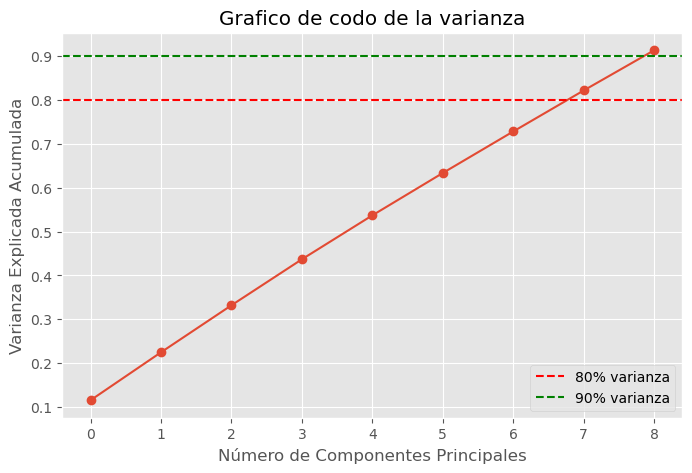

In [67]:
plt.close('all')
plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% varianza')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% varianza')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Grafico de codo de la varianza')
plt.grid(True)
plt.legend()
plt.show()

### Selección del número de componentes ###

PCA con 9 componentes reduce la dimensionalidad sin perder mucha información a un nivel de varianza de 91.35%

## 5. Interpretación de los componentes principales ##

### Análisis de "Loadings" ###

In [73]:
#Examinar los 3 componentes principales
nombres_componentes = [f'PC{i+1}' for i in range(pca.n_components_)]

loadings = pd.DataFrame(
    pca.components_.T,
    index=data_noId.columns,
    columns = nombres_componentes
)

for i in range(3):
    print(f"\nTop variables en PC{i+1}:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(5))


Top variables en PC1:
EmailsOpened             0.522384
DaysSinceLastPurchase    0.432799
AnnualIncome             0.427964
SpendingScore            0.422491
ItemsInCart              0.360764
Name: PC1, dtype: float64

Top variables en PC2:
AvgSessionDuration         0.622125
SocialMediaInteractions    0.436876
WebVisits                  0.346131
Age                        0.269820
SpendingScore              0.254560
Name: PC2, dtype: float64

Top variables en PC3:
Age                        0.486535
AdClicks                   0.423174
DaysSinceLastPurchase      0.363142
SocialMediaInteractions    0.351566
ItemsInCart                0.282898
Name: PC3, dtype: float64


### "Bautizar" los componentes ###

PC1: Frecuencia de gasto
PC2: Nivel de Interacción de Usuarios
PC3: Relación edad-anuncios

# Desarrollo de AA2-EV02 #

## 1. Preparación de los datos para clustering ##

In [80]:
# Crear el dataset reducido

df_noid = data_noId
X_pca = pca.transform(df_noid)

df_pca = pd.DataFrame(X_pca, columns=nombres_componentes)
df_pca.to_csv('Components_Data.csv', index=False)
print("Dataset 'Components_Data.csv.csv' generado con éxito.")

df_pca.head()

Dataset 'Components_Data.csv.csv' generado con éxito.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,76.770312,9.312406,2.834427,-52.307753,6.681311,75.815215,81.475796,37.748348,-12.643876
1,145.263195,115.378413,-73.338875,-35.320267,36.232056,21.293883,2.887705,-13.629979,169.778489
2,109.070837,102.515581,-85.115683,-70.511794,35.459417,54.545899,114.822241,-17.311338,59.959672
3,94.489691,130.443592,-98.222592,-75.622078,29.242950,10.969066,31.267373,-50.968092,103.154823
4,150.909210,84.354261,-37.086542,-25.450628,-1.066339,22.343506,-0.583132,41.188665,141.074442


In [82]:
df_pca = pd.read_csv('Components_Data.csv')

## 2. determinar el número óptimo de clústeres (K) ##

  File "C:\Users\juanf\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\juanf\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\juanf\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\juanf\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


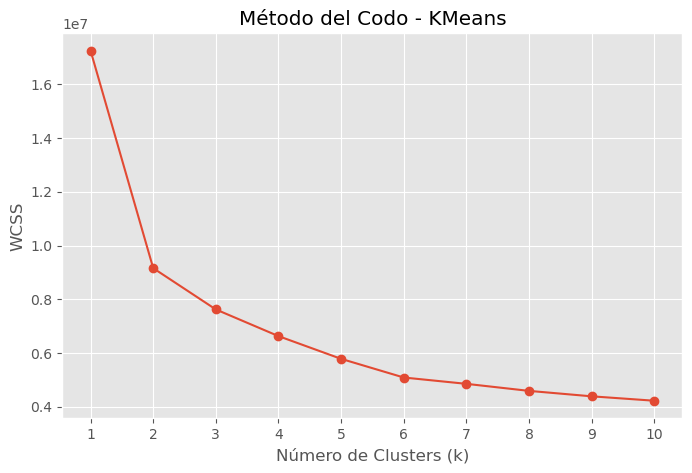

In [85]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.close('all')
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo - KMeans')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

El número ideal de clusters es 2

## 3. Construcción del modelo de clustering y asignación ##

In [92]:
# Entrenar Kmeans
k_optimo = 3

kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
clusters = kmeans_final.fit_predict(df_pca)

df_pca['Cluster'] = clusters + 1

# unir columna de Cluster al dataframe original
df_pca_id = pd.concat([df[['CustomerID']], df_pca], axis=1)
df_final = df.merge(df_pca_id[['CustomerID', 'Cluster']],
                    on='CustomerID',
                    how='left')
print(df_final.head())
print(df_final.info())
print(df_final['Cluster'].value_counts())

  CustomerID  Age  AnnualIncome  SpendingScore  WebVisits  \
0  CUST-0001   56           134             36          0   
1  CUST-0002   69            34             97         20   
2  CUST-0003   46           138             36         28   
3  CUST-0004   32            47              3          8   
4  CUST-0005   60            58             73         28   

   DaysSinceLastPurchase  EmailsOpened  AdClicks  SocialMediaInteractions  \
0                      7            21        13                       21   
1                    234            19         5                      125   
2                    107             7        11                      156   
3                    160            28        15                      168   
4                    208            39        16                       41   

   AvgSessionDuration  ItemsInCart  Cluster  
0                2.50            0        2  
1                2.43           14        3  
2               12.20           

In [101]:
print(df_final.head())

  CustomerID  Age  AnnualIncome  SpendingScore  WebVisits  \
0  CUST-0001   56           134             36          0   
1  CUST-0002   69            34             97         20   
2  CUST-0003   46           138             36         28   
3  CUST-0004   32            47              3          8   
4  CUST-0005   60            58             73         28   

   DaysSinceLastPurchase  EmailsOpened  AdClicks  SocialMediaInteractions  \
0                      7            21        13                       21   
1                    234            19         5                      125   
2                    107             7        11                      156   
3                    160            28        15                      168   
4                    208            39        16                       41   

   AvgSessionDuration  ItemsInCart  Cluster  
0                2.50            0        2  
1                2.43           14        3  
2               12.20           

## 4. Análisis y caracterización de los segmentos ##

In [107]:
clusters_resumen = df_final.groupby('Cluster').agg({
    'Age': 'mean',
    'AnnualIncome': 'mean',
    'SpendingScore': 'mean',
    'WebVisits': 'mean',
    'DaysSinceLastPurchase': 'mean',
    'EmailsOpened': 'mean',
    'AdClicks': 'mean',
    'SocialMediaInteractions': 'mean',
    'AvgSessionDuration': 'mean',
    'ItemsInCart': 'mean'
}).round(2)

clusters_resumen

,Age,AnnualIncome,SpendingScore,WebVisits,DaysSinceLastPurchase,EmailsOpened,AdClicks,SocialMediaInteractions,AvgSessionDuration,ItemsInCart
Cluster,,,,,,,,,,
1,43.42,86.66,46.62,14.52,305.21,53.76,25.11,101.42,15.57,6.74
2,45.08,81.46,48.30,14.42,62.82,48.75,24.94,100.53,14.91,7.09
3,42.92,81.08,50.47,14.30,179.98,46.97,24.46,97.79,15.61,6.98


In [109]:
# clientes en cada cluster
cluster_tamanos = df_final['Cluster'].value_counts().sort_index()
cluster_tamanos

Cluster
1    338
2    338
3    324
Name: count, dtype: int64

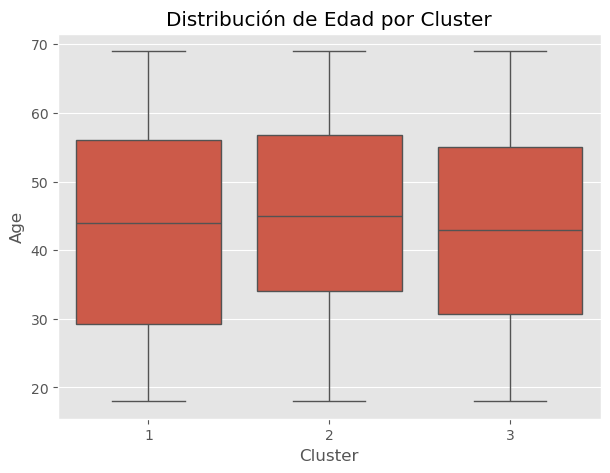

In [131]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_final, x='Cluster', y='Age')
plt.title('Distribución de Edad por Cluster')
plt.show()

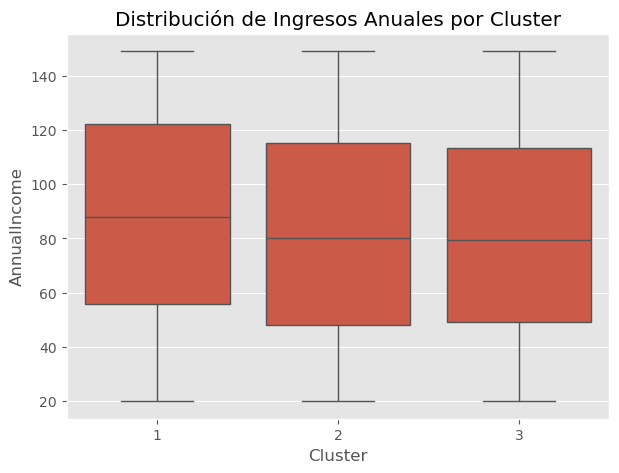

In [129]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_final, x='Cluster', y='AnnualIncome')
plt.title('Distribución de Ingresos Anuales por Cluster')
plt.show()

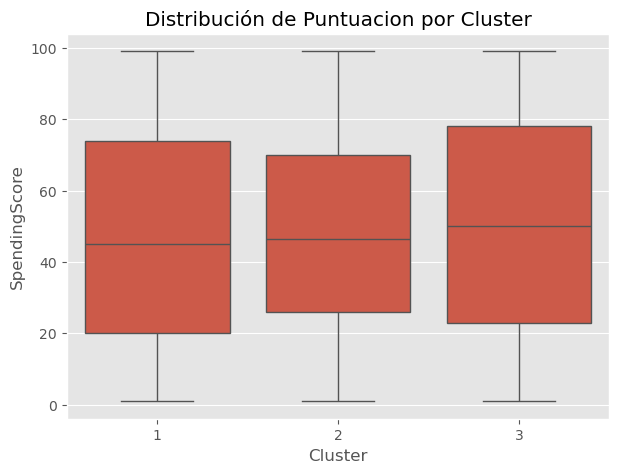

In [117]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_final, x='Cluster', y='SpendingScore')
plt.title('Distribución de Puntuacion por Cluster')
plt.show()

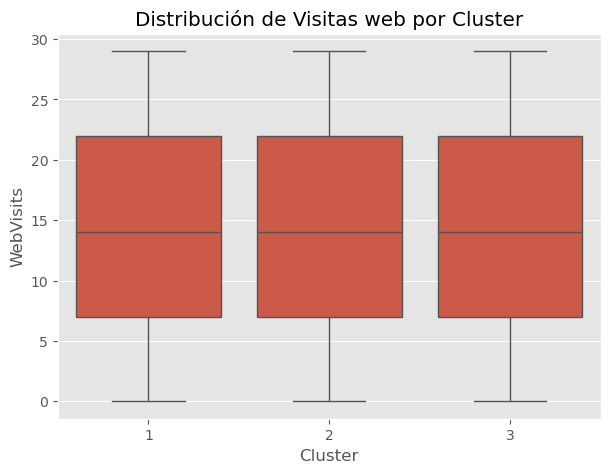

In [121]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_final, x='Cluster', y='WebVisits')
plt.title('Distribución de Visitas web por Cluster')
plt.show()

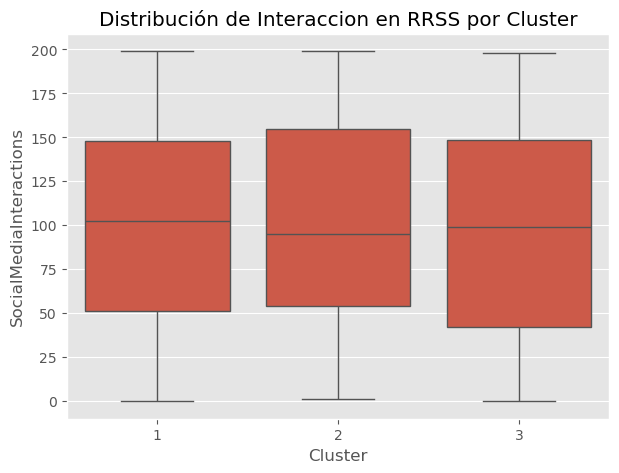

In [123]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_final, x='Cluster', y='SocialMediaInteractions')
plt.title('Distribución de Interaccion en RRSS por Cluster')
plt.show()

In [125]:
global_mean = df_final.mean(numeric_only=True)

diff = clusters_resumen - global_mean
diff

,AdClicks,Age,AnnualIncome,AvgSessionDuration,Cluster,DaysSinceLastPurchase,EmailsOpened,ItemsInCart,SocialMediaInteractions,SpendingScore,WebVisits
Cluster,,,,,,,,,,,
1,0.267,-0.399,3.565,0.21025,NaN,122.504,3.894,-0.196,1.478,-1.813,0.105
2,0.097,1.261,-1.635,-0.44975,NaN,-119.886,-1.116,0.154,0.588,-0.133,0.005
3,-0.383,-0.899,-2.015,0.25025,NaN,-2.726,-2.896,0.044,-2.152,2.037,-0.115


In [133]:
cluster_profile = df_final.groupby('Cluster')[features].mean()

plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Perfil medio por Cluster')
plt.show()

NameError: name 'features' is not defined

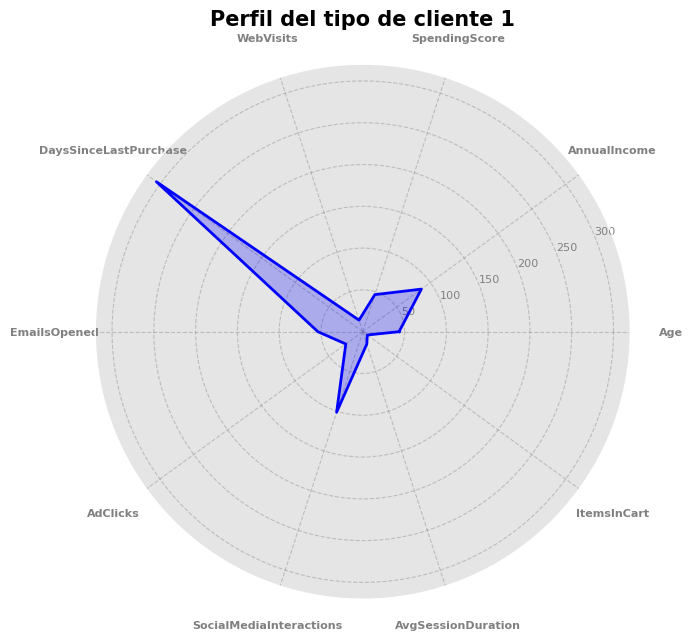

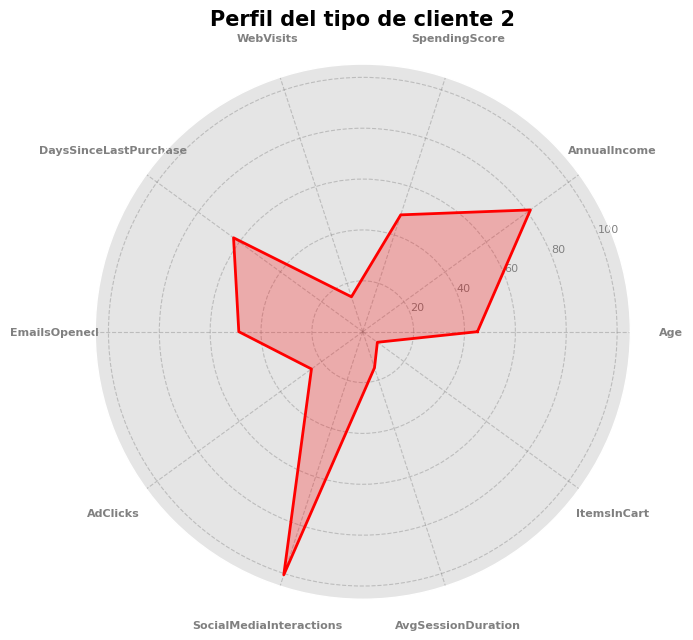

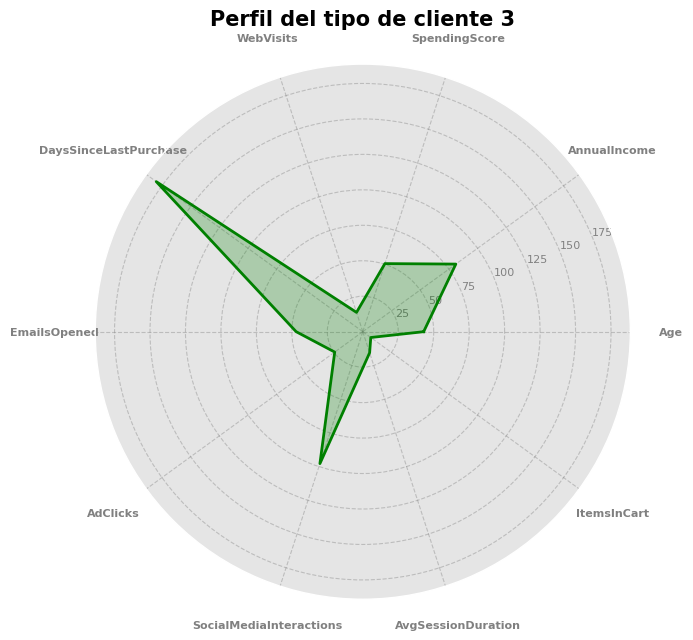

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Variables a mostrar
features = ['Age', 'AnnualIncome', 'SpendingScore', 'WebVisits',
            'DaysSinceLastPurchase', 'EmailsOpened', 'AdClicks',
            'SocialMediaInteractions', 'AvgSessionDuration', 'ItemsInCart']

# Medias por cluster
cluster_profile = df_final.groupby('Cluster')[features].mean()

# Colores específicos para cada cluster
cluster_colors = {
    1: 'blue',    
    2: 'red',     
    3: 'green'   
}

# Preparación radial
N = len(features)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

plt.style.use('ggplot')

for cluster in cluster_profile.index:
    values = cluster_profile.loc[cluster].tolist()
    values += values[:1]

    fig = plt.figure(figsize=(7, 7))
    ax = plt.subplot(111, polar=True)

    # Plot
    ax.plot(angles, values, linewidth=2, color=cluster_colors[cluster])
    ax.fill(angles, values, alpha=0.25, color=cluster_colors[cluster])

    # Etiquetas
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10, fontweight='bold')

    # Mover etiquetas hacia afuera
    for label, angle in zip(ax.get_xticklabels(), angles):
        label.set_horizontalalignment('center')
        x, y = label.get_position()
        label.set_position((x, y - 0.08))

    # Estilo
    ax.tick_params(colors="gray", labelsize=8)
    ax.grid(color="gray", linestyle="--", alpha=0.4)
    plt.title(f"Perfil del tipo de cliente {cluster}", fontsize=15, fontweight='bold')

    plt.tight_layout()
    plt.show()


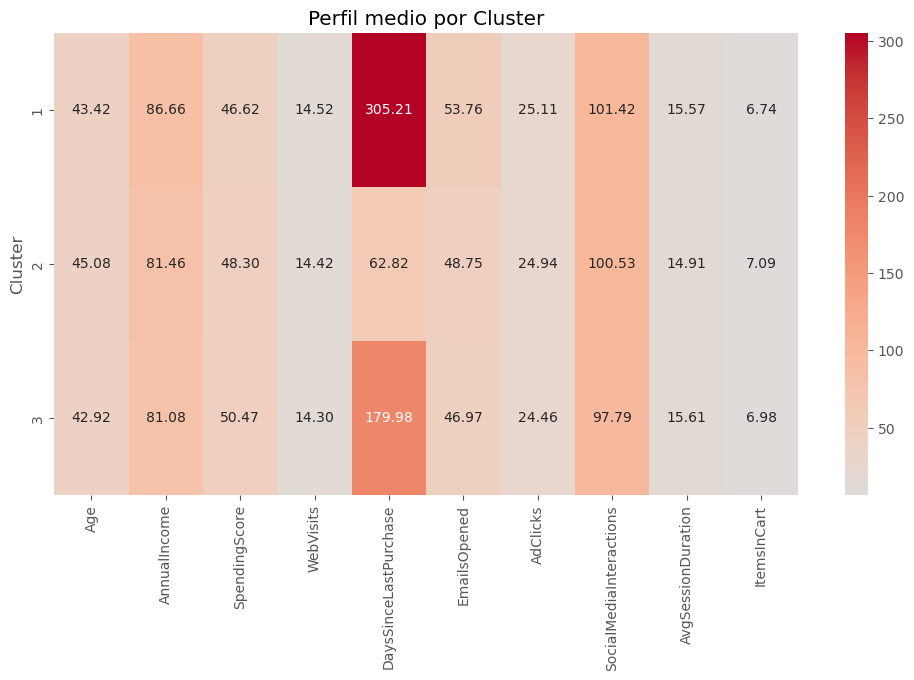

In [137]:
cluster_profile = df_final.groupby('Cluster')[features].mean()

plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Perfil medio por Cluster')
plt.show()

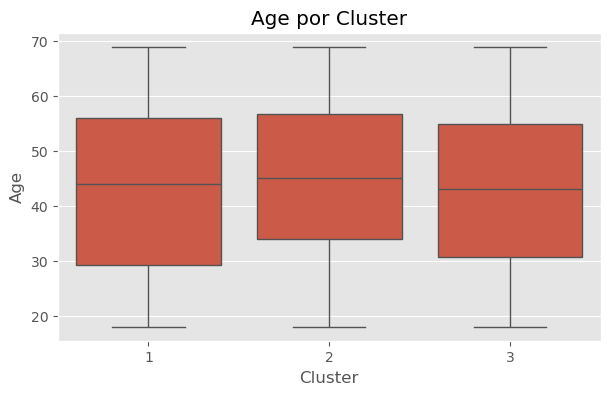

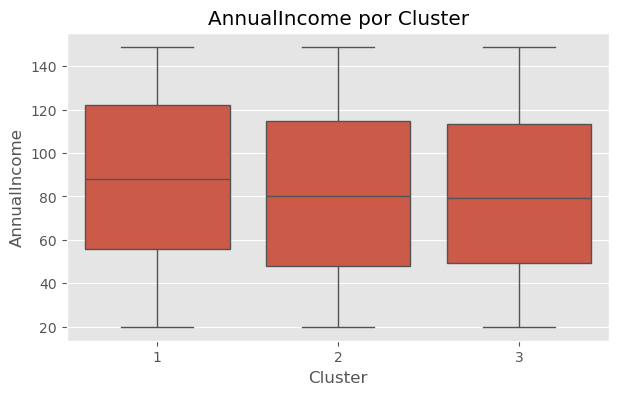

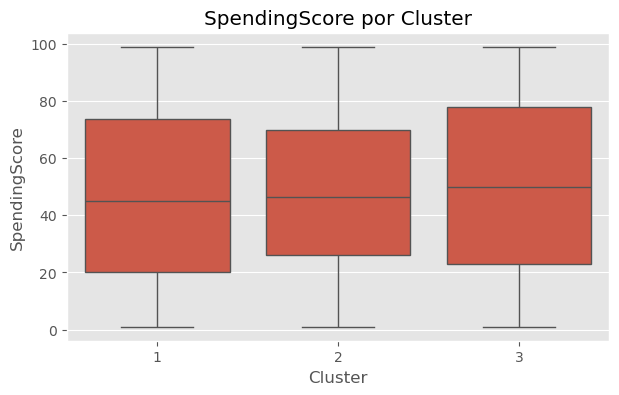

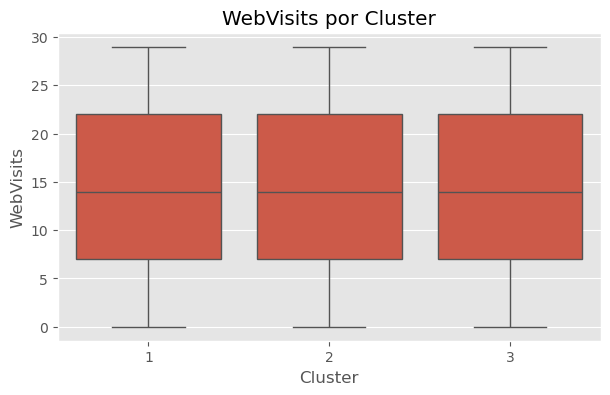

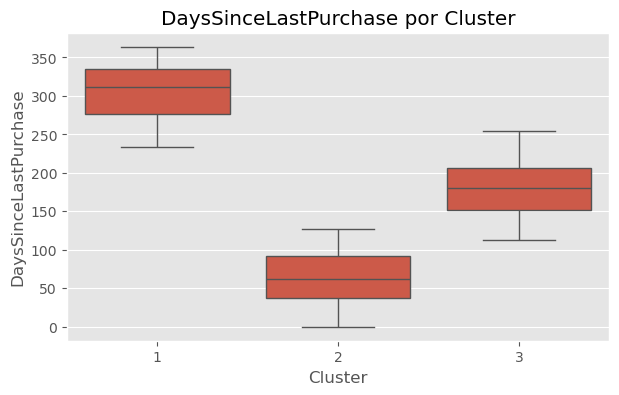

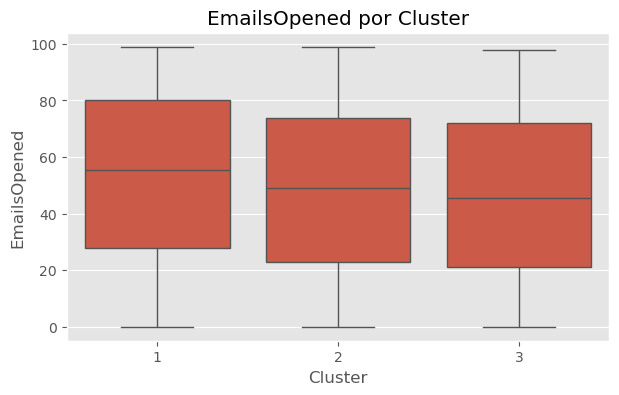

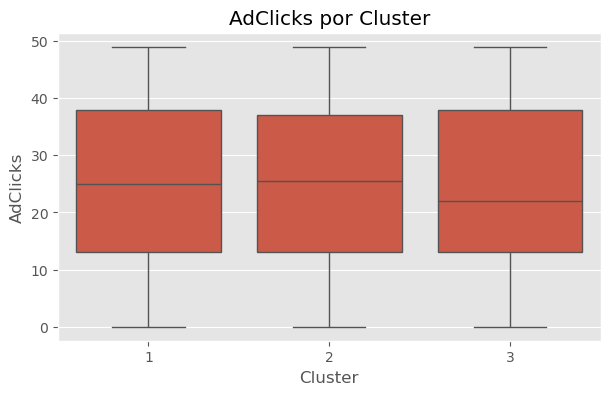

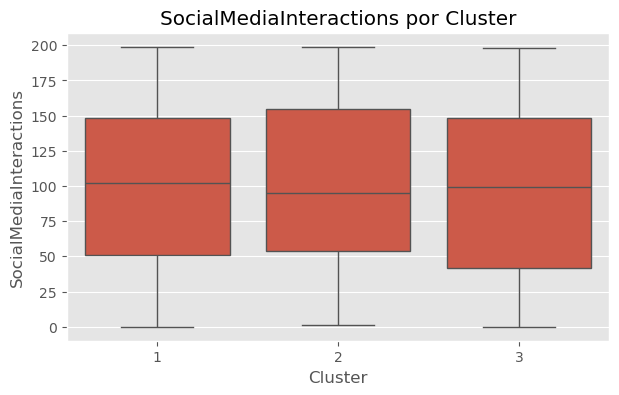

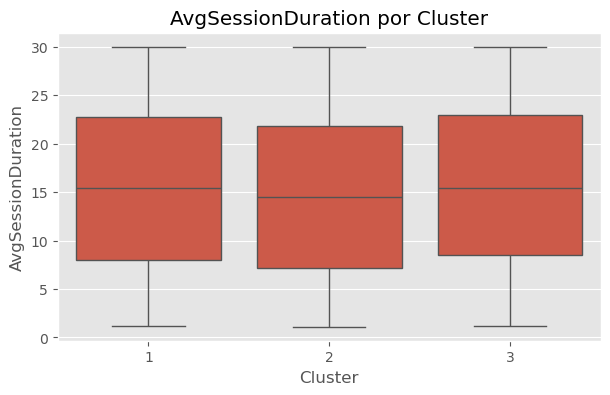

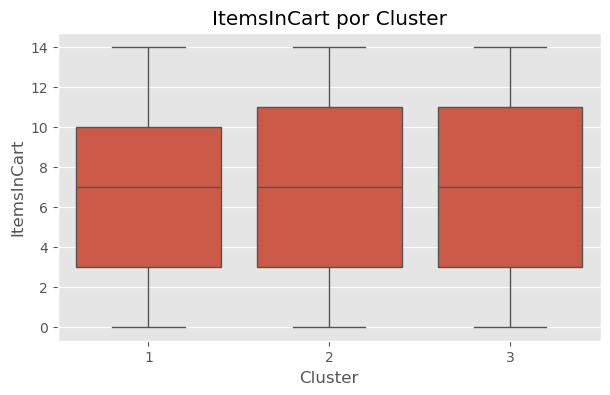

In [139]:
for col in features:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df_final, x='Cluster', y=col)
    plt.title(f'{col} por Cluster')
    plt.show()

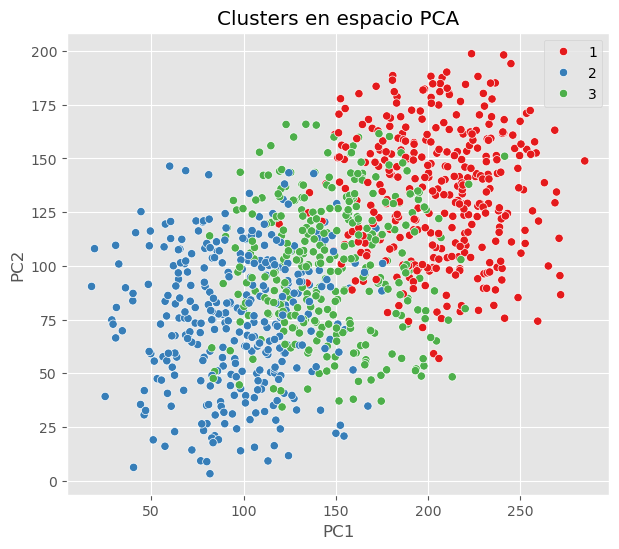

In [141]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Clusters en espacio PCA')
plt.legend()
plt.show()